# Groupby 

files needed = ('Most-Recent-Cohorts-Scorecard-Elements.csv')

We often want to know how groups differ. Do workers with econ degrees make more than workers with history degrees? Do men live longer than women? Does it matter how much education you have? 

Pandas provides the `groupby( )` method to ease computing statistics by group ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)). This kind of method shows up in many data-oriented computing languages and packages. The idea is summed up as 

> split-apply-combine

Here is the canonical [illustration](https://www.oreilly.com/library/view/learning-pandas/9781783985128/ch09s02.html). The big idea is to 
1. **Split** the data up into groups. The groups are defined by *key* variables.
2. **Apply** some method or function to each group: mean, std, max, etc. This returns a smaller bit of data, often just one number.
3. **Combine** the results of the 'apply' from each group into a new data structure.
  
  
Apply-split-combine is an incredibly powerful feature of pandas. We will cover the basics here. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('precision', 3)       # this tells pandas to print out 3 decimal places when we print a DataFrame

## College Scorecard
Let's take this opportunity to learn about a new dataset: [The College Scorecard](https://collegescorecard.ed.gov/data/). The data are compiled by the Dept. of Education to help students evaluate higher education institutions. The data are very well documented and include such juicy variables as: prices, after program debt levels, earnings, completion rates, information about student outcomes by family income and other demographic variables. 

We will be working off of the 'most recent data' file. It is in our shared folder, but you can also get it from [here](https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv). 

\[For extra practice, you can try to open the dataset directly from the url, rather than downloading it first.\] 

In [2]:
colscd = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
colscd.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,0,3,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,0.5448,0.12,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.028,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,0.5121,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.021,0.5804,0.1678,0.2308


This dataset is too big for our needs. Let's rename the variables to something easier to understand and keep just a few variables that look interesting. 

In [3]:
colscd = colscd.rename(columns = {'CONTROL':'ownership', 'INSTNM':'name', 'STABBR':'state', 'PREDDEG':'type', 'SATVRMID':'sat_read_med', 
                      'SATMTMID':'sat_math_med', 'SATWRMID':'sat_write_med', 'PCIP24':'sh_las', 'PCIP51':'sh_bus',
                     'PCIP11':'sh_cs', 'MD_EARN_WNE_P10':'earn_10', 'GRAD_DEBT_MDN_SUPP':'debt_at_grad'})

In [4]:
cols_to_keep = ['name', 'state', 'ownership', 'type','sat_read_med',  'sat_math_med', 'sat_write_med',
                'sh_las', 'sh_bus', 'sh_cs', 'earn_10', 'debt_at_grad']

colscd = colscd[cols_to_keep]

colscd.head()

,name,state,ownership,type,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad
0,Alabama A & M University,AL,1,3,425.0,428.0,414.0,0.062,0.000,0.035,31000,32750
1,University of Alabama at Birmingham,AL,1,3,535.0,645.0,NaN,0.019,0.249,0.014,41200,21833
2,Amridge University,AL,2,3,NaN,NaN,NaN,0.127,0.000,0.000,39600,22890
3,University of Alabama in Huntsville,AL,1,3,605.0,600.0,NaN,0.000,0.102,0.075,46700,22647
4,Alabama State University,AL,1,3,433.0,428.0,NaN,0.000,0.183,0.057,27700,31500


The ownership and type variables are coded as integers. I would rather they were easy to understand. 

In [5]:
type_codes = {0:'na', 1:'cert', 2:'asc', 3:'bach', 4:'grad_only'}
colscd['type'] = colscd['type'].replace(type_codes)

own_codes = {1:'Public', 2:'Private nonprofit', 3:'Private profit'}
colscd['ownership'] = colscd['ownership'].replace(own_codes)
colscd.head()

,name,state,ownership,type,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad
0,Alabama A & M University,AL,Public,bach,425.0,428.0,414.0,0.062,0.000,0.035,31000,32750
1,University of Alabama at Birmingham,AL,Public,bach,535.0,645.0,NaN,0.019,0.249,0.014,41200,21833
2,Amridge University,AL,Private nonprofit,bach,NaN,NaN,NaN,0.127,0.000,0.000,39600,22890
3,University of Alabama in Huntsville,AL,Public,bach,605.0,600.0,NaN,0.000,0.102,0.075,46700,22647
4,Alabama State University,AL,Public,bach,433.0,428.0,NaN,0.000,0.183,0.057,27700,31500


Set the index to the university name. 
How do we look?

In [6]:
colscd.set_index('name', inplace=True)
colscd.loc['University of Wisconsin-Madison']

state                WI
ownership        Public
type               bach
sat_read_med        655
sat_math_med        710
sat_write_med       640
sh_las                0
sh_bus           0.0548
sh_cs            0.0354
earn_10           56200
debt_at_grad      22241
Name: University of Wisconsin-Madison, dtype: object

Unless I read the documentation wrong, (or made some other mistake) this says UW didn't give out an liberal arts degrees. I doubt that it true...

One last check before we get to work. 

In [7]:
colscd.dtypes

state             object
ownership         object
type              object
sat_read_med     float64
sat_math_med     float64
sat_write_med    float64
sh_las           float64
sh_bus           float64
sh_cs            float64
earn_10           object
debt_at_grad      object
dtype: object

Doh! looks like the earnings and debt came in as objects instead of floats.

The culprit is the 'PrivacySuppressed' flag. We could have told `read_csv` about this if we knew in advance. I found this problem by using `colscd['earn_10'].unique()`.

Instead, let's practice `to_numeric( )` which tries to convert a column to numeric values. I pass the parameter `error='coerce'` to tell the method to set anything it cannot convert to a NaN.  


In [8]:
colscd['earn_10'] = pd.to_numeric(colscd['earn_10'], errors='coerce')
colscd['debt_at_grad'] = pd.to_numeric(colscd['debt_at_grad'], errors='coerce')
colscd.dtypes

state             object
ownership         object
type              object
sat_read_med     float64
sat_math_med     float64
sat_write_med    float64
sh_las           float64
sh_bus           float64
sh_cs            float64
earn_10          float64
debt_at_grad     float64
dtype: object

## 1. Split: groupby( )
We pass groupby a 'key' which tells the method which variable to, well, group by. This is the **split** step.

What is `colscd_grouped`?

In [9]:
colscd_grouped = colscd.groupby('state')
print(type(colscd_grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


A DataFrameGroupBy object. This is basically a DataFrame + the grouping information. 

What does it look like? A DataFrameGroupBy is an iterable object. It returns subsets of the original DataFrame by group. In our case, the groups are defined by state. 

The `.get_group()` returns a group. 

In [10]:
colscd_grouped.get_group('WI').sort_index()
#for g in colscd_grouped:
#    print(g)

,state,ownership,type,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad
name,,,,,,,,,,,
Academy of Cosmetology,WI,Private profit,cert,NaN,NaN,NaN,0.000,0.000,0.000,NaN,12000.0
Advanced College of Cosmetology,WI,Private profit,cert,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
Alverno College,WI,Private nonprofit,bach,NaN,NaN,498.0,0.173,0.361,0.006,38800.0,31000.0
Aveda Institute-Madison,WI,Private profit,cert,NaN,NaN,NaN,0.000,0.100,0.000,NaN,9829.0
Bella Academy of Cosmetology,WI,Private profit,cert,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin Academy,WI,Private profit,cert,NaN,NaN,NaN,0.000,0.000,0.000,NaN,12000.0
Wisconsin Indianhead Technical College,WI,Public,cert,NaN,NaN,NaN,0.000,0.479,0.032,32500.0,7873.5
Wisconsin Lutheran College,WI,Private nonprofit,bach,577.0,567.0,NaN,0.000,0.075,0.013,41300.0,24234.0


## 2. + 3. Apply and combine
A major use of groupby is to perform some kind of aggregation. This is the **apply** and **combine** step. Let's take the grouped data and compute some means. 

In [11]:
all_means = colscd_grouped.mean()  # apply the mean operator to the grouped data

print(type(all_means))             # what do we get back?

<class 'pandas.core.frame.DataFrame'>


In [12]:
# Ah, a DataFrame. We know what to do with that. 
all_means.head(10)

,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad
state,,,,,,,,
AK,575.000,575.000,482.500,0.076,0.169,0.017,37800.000,13711.500
AL,534.773,528.727,498.000,0.104,0.243,0.025,31548.000,19370.080
AR,554.500,551.929,464.200,0.115,0.195,0.017,28575.000,15111.977
AS,NaN,NaN,NaN,0.373,0.066,0.000,22300.000,NaN
AZ,581.143,570.714,505.000,0.064,0.284,0.028,33579.310,13884.727
CA,584.542,582.958,570.540,0.066,0.270,0.025,37350.787,14356.604
CO,578.133,574.733,570.000,0.048,0.293,0.023,33572.000,16889.060
CT,570.000,560.412,518.167,0.067,0.264,0.017,42060.317,15397.246
DC,624.600,617.000,605.000,0.012,0.144,0.064,47568.750,23521.088


When we used mean() one the grouped data, it **applied** the mean method to each group, which creates one number per group (for each column). It then **combined** the means into a DataFrame, one number per group per column. Nice.  

Notice that the categorical data (name, state, type) have been dropped.

Here we can see the result of pd.set_option('precision'). The output is limited to 3 decimal places. 

## 1. + 2. + 3. Split-apply-combine

Computing the grouped data first helped us understand what was happening, but we can do the whole split-apply-combine in one step. One simple line of code.

In [13]:
all_means = colscd.groupby('state').mean()
all_means.head(10)

,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad
state,,,,,,,,
AK,575.000,575.000,482.500,0.076,0.169,0.017,37800.000,13711.500
AL,534.773,528.727,498.000,0.104,0.243,0.025,31548.000,19370.080
AR,554.500,551.929,464.200,0.115,0.195,0.017,28575.000,15111.977
AS,NaN,NaN,NaN,0.373,0.066,0.000,22300.000,NaN
AZ,581.143,570.714,505.000,0.064,0.284,0.028,33579.310,13884.727
CA,584.542,582.958,570.540,0.066,0.270,0.025,37350.787,14356.604
CO,578.133,574.733,570.000,0.048,0.293,0.023,33572.000,16889.060
CT,570.000,560.412,518.167,0.067,0.264,0.017,42060.317,15397.246
DC,624.600,617.000,605.000,0.012,0.144,0.064,47568.750,23521.088


### Aggregation methods

Some common aggregation methods include: `.mean()`, `.sum()`, `.std()`, `.describe()`, `.min()`, `.max()`, but there are many more. Any function that returns a scalar will work. 

### gropuby( ) on a subset of columns
We may not care about all the columns in our datset for a particular groupby. We can subset our DataFrame as usual and compute a groupby. 

Let's focus on the median SAT scores. We will group by the 'ownership variable.

In [14]:
# Grab the cols we want from the df before using the groupby. Remember to keep the grouping variable, too.
sat_medians_1 = colscd[['sat_read_med', 'sat_math_med', 'sat_write_med', 'ownership']].groupby('ownership').median()
sat_medians_1

,sat_read_med,sat_math_med,sat_write_med
ownership,,,
Private nonprofit,557.0,545.0,505.0
Private profit,550.0,523.0,488.5
Public,550.0,545.0,490.0


## Practice

1. Create a dataset with only public institutions. Name it `pub`

In [15]:
pub = colscd[colscd['ownership']=='Public']

The `quantile( )` method computes quantiles from the data. (e.g., `quantile(0.5)` computes the median, or the the 50th quantile)

2. Let's look at a measure of the earnings spread for different **institution types**

    a. Compute the 75th quantile for 'earn_10' for each 'type'.
    
    b. Compute the 50th quantile for 'earn_10' for each 'type'.
    
    c. Compute the 25th quantile for 'earn_10' for each 'type'.
    
You should have three new DataFrames, each containing the one of the quantile statistics. 

In [16]:
q75 = pub.groupby('type')[['earn_10']].quantile(0.75)
q50 = pub.groupby('type')[['earn_10']].quantile(0.50)
q25 = pub.groupby('type')[['earn_10']].quantile(0.25)

In [17]:
q25

,earn_10
type,
asc,28600.0
bach,37350.0
cert,25800.0
grad_only,50100.0
na,30100.0


2d. For each type, compute the difference between the 75 percentile and the 25 percentile and divide it by the median. 

This is sometimes called the *quartile-based coefficient of variation*. It is a measure of the variability of a variable. It is less sensitive to outliers than the coefficient of variation, which is the standard deviation divided by the mean. 

In [18]:
spread = (q75 - q25)/ q50
spread

,earn_10
type,
asc,0.196
bach,0.266
cert,0.266
grad_only,0.917
na,0.199


Wow, a lot of dispersion in the grad_only group. Let's practice some more. 



3. How do reading and writing scores correlate?

    a. Compute the median SAT reading and writing scores by **state**. 


In [19]:

sat_rw_med = pub[['sat_read_med', 'sat_write_med', 'state']].groupby('state').median()
sat_rw_med.head()

,sat_read_med,sat_write_med
state,,
AK,575.0,510.0
AL,537.5,514.0
AR,517.0,450.0
AS,NaN,NaN
AZ,590.0,NaN


3b. Create a scatter plot with the median reading score on the x axis and writing score on the y axis.  

If you finished early try:
1. Adding the 45-degree line to the plot. 
2. Replacing the data marker with the two-letter state abbreviation at each point

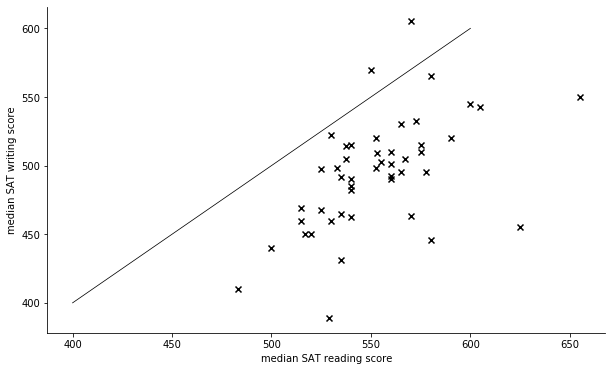

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(sat_rw_med['sat_read_med'], sat_rw_med['sat_write_med'], color='black', marker='x')
ax.plot([400, 600], [400, 600], color='black', linewidth=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('median SAT reading score')
ax.set_ylabel('median SAT writing score')

plt.show()

### Working with quantiles
We learned how to use `.cut()` and `.qcut()` to create discrete variables or 'bins'. Let's cut the data by the share of business degrees.  


In [21]:
# Making a copy of the original data so we don't change it
colscd_degrees = colscd

# Cut into 3 bins
colscd_degrees['bus_rank'] = pd.cut(colscd_degrees['sh_bus'], 3, right=False)
colscd_degrees.head(2)

,state,ownership,type,sat_read_med,sat_math_med,sat_write_med,sh_las,sh_bus,sh_cs,earn_10,debt_at_grad,bus_rank
name,,,,,,,,,,,,
Alabama A & M University,AL,Public,bach,425.0,428.0,414.0,0.062,0.000,0.035,31000.0,32750.0,"[0.0, 0.333)"
University of Alabama at Birmingham,AL,Public,bach,535.0,645.0,NaN,0.019,0.249,0.014,41200.0,21833.0,"[0.0, 0.333)"


Remember, cut returns a Categorical object. We can use this object as our key variable in a groupby.

In [22]:
earn_bus = colscd_degrees.groupby('bus_rank')['earn_10']

In [23]:
earn_bus.count()

bus_rank
[0.0, 0.333)      3434
[0.333, 0.667)     631
[0.667, 1.001)     773
Name: earn_10, dtype: int64

### Several statistics at once
Once we have grouped our data, we have been hitting it with methods to compute statistics: mean(), count(),...

We now introduced the `agg( )` method, which lets us compute several moments at once --- you can even pass it a user defined function. 

In [24]:
# This is the same as earn_bus.count()
earn_bus.agg('count')

bus_rank
[0.0, 0.333)      3434
[0.333, 0.667)     631
[0.667, 1.001)     773
Name: earn_10, dtype: int64

In [25]:
# But agg() lets us compute many stats at once
earn_bus.agg(['count', 'mean', 'median', 'std', 'max'])

,count,mean,median,std,max
bus_rank,,,,,
"[0.0, 0.333)",3434,35198.195,34300.0,12990.260,132300.0
"[0.333, 0.667)",631,31037.876,29400.0,8657.804,67400.0
"[0.667, 1.001)",773,33301.423,27900.0,15773.169,127900.0


Schools that focus on business outcomes don't seem to offer greater earnings opportunities. 

## Practice
1. Write a function that returns the average of the 5 largest elements of a Series (a column of a DataFrame). Name the function 'avg5'.

The input, name it `x`,  will be a column of a DataFrame. The output is a single number. 

In [26]:
def avg5(x):
    top5 = x.sort_values()[-5:]   # sort x, then grab the five largest. sort defaults to descending
    return top5.mean()            # return the mean 

2. Test your function on column 'a' of the DataFrame defined below. The answer should be 8.

```python
test = pd.DataFrame({'a':[1, 4, 6, 9, 10, 3, 7, 8], 'b':[2, 3, 4, 5, 6, 7, 8, 10] })
```

In [27]:
test = pd.DataFrame({'a':[1, 4, 6, 9, 10, 3, 7, 8], 'b':[2, 3, 4, 5, 6, 7, 8, 10] })

In [28]:
avg5(test['a'])

8.0

Now return to `colscd`

3. Drop any observation that has 'debt_at_grad' == NaN
4. Compute the mean, median, and avg5  'debt_at_grad' by **'ownership'**. Compute them all at once using `.agg()`.

In [29]:
colscd.dropna(subset=['debt_at_grad'] , inplace=True)   # Drop the missing values

colscd.groupby('ownership')['debt_at_grad'].agg(['mean', 'median', avg5]) # Compute the summary stats

,mean,median,avg5
ownership,,,
Private nonprofit,22446.198,24750.0,43574.2
Private profit,14069.625,10556.0,45643.7
Public,14203.894,12000.0,34669.2


### groupby( ) with many keys
Can we group by several keys? You know we can. Let's compute the medians this time.

In [30]:
sat_medians = colscd.groupby(['ownership','type']).median()
sat_medians

sat_read_med  sat_math_med  sat_write_med  \
ownership         type                                                   
Private nonprofit asc               475.0         475.0          438.0   
                  bach              560.0         545.0          506.5   
                  cert              535.0         517.0          480.0   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   
Private profit    asc                 NaN           NaN            NaN   
                  bach              550.0         523.0          488.5   
                  cert                NaN           NaN            NaN   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   
Public            asc               512.5         495.0          443.0   
                  bach              550.0         546.5          490.0   
                  cert                NaN           NaN          391.0   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   

                             sh_las  sh_bus  sh_cs  earn_10  debt_at_grad  
ownership         type                                                     
Private nonprofit asc         0.000   0.490  0.000  34200.0      18750.00  
                  bach        0.002   0.057  0.011  42800.0      25000.00  
                  cert        0.000   0.737  0.000  26800.0      10556.00  
                  grad_only   0.000   0.000  0.000  49000.0      17361.00  
                  na            NaN     NaN    NaN  34250.0      23340.00  
Private profit    asc         0.000   0.536  0.000  28600.0      20635.75  
                  bach        0.000   0.016  0.045  41400.0      30481.00  
                  cert        0.000   0.000  0.000  23100.0       9500.00  
                  grad_only     NaN     NaN    NaN  34500.0      30352.00  
                  na            NaN     NaN    NaN  34600.0      18254.00  
Public            asc         0.325   0.188  0.028  32100.0       9655.50  
                  bach        0.019   0.094  0.025  43100.0      21500.00  
                  cert        0.035   0.336  0.012  31300.0       9342.50  
                  grad_only     NaN     NaN    NaN  51400.0      21750.00  
                  na            NaN     NaN    NaN  34750.0      11848.50

Now we have a MultiIndexed DataFrame with the summary statistics, this time, the median. 

In [31]:
sat_medians = colscd.groupby(['ownership','type'])[['sat_read_med', 'sat_math_med', 'sat_write_med']].median()
sat_medians

sat_read_med  sat_math_med  sat_write_med
ownership         type                                                
Private nonprofit asc               475.0         475.0          438.0
                  bach              560.0         545.0          506.5
                  cert              535.0         517.0          480.0
                  grad_only           NaN           NaN            NaN
                  na                  NaN           NaN            NaN
Private profit    asc                 NaN           NaN            NaN
                  bach              550.0         523.0          488.5
                  cert                NaN           NaN            NaN
                  grad_only           NaN           NaN            NaN
                  na                  NaN           NaN            NaN
Public            asc               512.5         495.0          443.0
                  bach              550.0         546.5          490.0
                  cert                NaN           NaN          391.0
                  grad_only           NaN           NaN            NaN
                  na                  NaN           NaN            NaN

The three ownership types all have institutions that predominately offer bachelors degrees. Let's grab that set of statistics. 

In [32]:
bach_sat_med = sat_medians.xs('bach', level='type')         # xs() indexes data from a MultiIndex
print(bach_sat_med)

                   sat_read_med  sat_math_med  sat_write_med
ownership                                                   
Private nonprofit         560.0         545.0          506.5
Private profit            550.0         523.0          488.5
Public                    550.0         546.5          490.0


How do the median SAT scores compare across public and private institutions? 

There are a few new plotting tricks here...

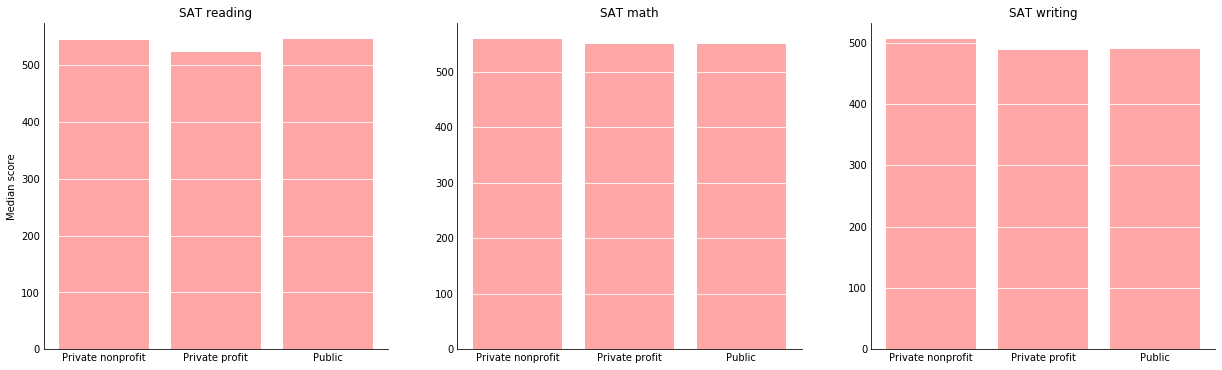

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(21,6))

# Set up the color scheme. This makes it easier to fiddle with.
bar_color = 'red'
bar_alpha = 0.35

# Plot one SAT variable on each axes
ax[0].bar(bach_sat_med.index, bach_sat_med['sat_math_med'], color=bar_color, alpha=bar_alpha)
ax[1].bar(bach_sat_med.index, bach_sat_med['sat_read_med'], color=bar_color, alpha=bar_alpha)
ax[2].bar(bach_sat_med.index, bach_sat_med['sat_write_med'],color=bar_color, alpha=bar_alpha)

# Titles!
ax[0].set_title('SAT reading')
ax[1].set_title('SAT math')
ax[2].set_title('SAT writing')

# I am only setting the ylabel on the left-most. Save some non-data ink.
ax[0].set_ylabel('Median score')

# Set these common parameters by looping over the axes.
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.grid(axis='y', color='white')                # Still experimenting with this...
    a.xaxis.set_tick_params(length=0)              # Kill the xaxis ticks
    a.yaxis.set_tick_params(length=0)              # Kill the yaxis ticks
    
plt.show()


Interesting. Private for-profit institutions seem to have about the same quality of writing scores, a bit lower math scores and substantially lower reading scores. Once we fire up some stats model packages, we can do formal tests to see if they are significantly different.  

## Extra practice

If you want to practice some more, try writing three functions: One returns the 25 percentile, one returns the 50th percentile and one returns the 75 percentile. 


Then redo question 2 from the first practice, but using only one groupby and and the `.agg()` method. 

2. Let's look at a measure of the earnings spread for different institution types
   1. Compute the 75th quantile for 'earn_10' for each 'type'.
   2. Compute the 50th quantile for 'earn_10' for each 'type'.
   3. Compute the 25th quantile for 'earn_10' for each 'type'.

You should have three new DataFrames, each containing the one of the quantile statistics.


In [34]:
def qt75(x):
    return x.quantile(0.75)

def qt25(x):
    return x.quantile(0.25)

def qt50(x):
    return x.quantile(0.5)

qts = colscd[['earn_10', 'type']].groupby('type').agg([qt25, qt50, qt75])
qts


earn_10                   
              qt25     qt50      qt75
type                                 
asc        28100.0  31500.0   35100.0
bach       36700.0  42800.0   49000.0
cert       20500.0  25000.0   30400.0
grad_only  44400.0  50100.0  102100.0
na         30100.0  34600.0   45900.0

2d. For each type, compute the difference between the 75 percentile and the 25 percentile and divide it by the median. 

This is sometimes called the *quartile-based coefficient of variation*. It is a measure of the variability of a variable. It is less sensitive to outliers than the coefficient of variation, which is the standard deviation divided by the mean. 

In [35]:
qts[('earn_10', 'qcv')] = (qts[('earn_10', 'qt75')] - qts[('earn_10', 'qt25')])/qts[('earn_10', 'qt50')]
qts

earn_10                          
              qt25     qt50      qt75    qcv
type                                        
asc        28100.0  31500.0   35100.0  0.222
bach       36700.0  42800.0   49000.0  0.287
cert       20500.0  25000.0   30400.0  0.396
grad_only  44400.0  50100.0  102100.0  1.152
na         30100.0  34600.0   45900.0  0.457